In [2]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scirpy as ir
import muon as mu

2025-01-25 10:30:03.219219: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-25 10:30:03.219252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-25 10:30:03.220126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 10:30:03.224991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-25 10:30:03.811990: W tensorflow/compiler/tf2

In [2]:
df_110= pd.read_csv('/home/emma/data/CART/TCR_seq/GSM6415277_pt110-day7-car-t-tcr-filtered_contig_annotations.csv.gz')
df_110

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id
0,AAACCTGAGACCACGA-1,True,AAACCTGAGACCACGA-1_contig_1,True,523,TRA,TRAV14/DV4,NaN,TRAJ26,TRAC,True,True,CAMRENNYGQNFVF,TGTGCAATGAGAGAGAATAACTATGGTCAGAATTTTGTCTTT,1079,9,clonotype5207,clonotype5207_consensus_2
1,AAACCTGAGACCACGA-1,True,AAACCTGAGACCACGA-1_contig_2,True,507,TRB,TRBV12-4,NaN,TRBJ1-6,TRBC1,True,True,CASSLRTGLNSPLHF,TGTGCCAGCAGTTTACGGACAGGGCTAAATTCACCCCTCCACTTT,104,1,clonotype5207,clonotype5207_consensus_1
2,AAACCTGAGAGCTGGT-1,True,AAACCTGAGAGCTGGT-1_contig_1,True,624,TRA,TRAV3,NaN,TRAJ10,TRAC,True,True,CAVRDRVTGGGNKLTF,TGTGCTGTGAGAGACAGGGTCACGGGAGGAGGAAACAAACTCACCTTT,715,9,clonotype5681,clonotype5681_consensus_2
3,AAACCTGAGAGCTGGT-1,True,AAACCTGAGAGCTGGT-1_contig_2,True,564,TRB,TRBV7-9,TRBD1,TRBJ1-4,TRBC1,True,True,CASSFSGQGGHEKLFF,TGTGCCAGCAGCTTTTCCGGACAGGGAGGTCATGAAAAACTGTTTTTT,2065,26,clonotype5681,clonotype5681_consensus_1
4,AAACCTGAGCGCCTTG-1,True,AAACCTGAGCGCCTTG-1_contig_1,True,486,TRB,TRBV27,NaN,TRBJ2-2,TRBC2,True,True,CASAPSTGELFF,TGTGCCAGCGCCCCATCAACTGGGGAGCTGTTTTTT,2386,30,clonotype1107,clonotype1107_consensus_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13451,TTTGTCAAGTGTACGG-1,True,TTTGTCAAGTGTACGG-1_contig_1,True,499,TRB,TRBV9,NaN,TRBJ1-5,TRBC1,True,True,CASSVGGGSNQPQHF,TGTGCCAGCAGCGTAGGGGGAGGGAGCAATCAGCCCCAGCATTTT,515,8,clonotype3218,clonotype3218_consensus_1
13452,TTTGTCAAGTTACCCA-1,True,TTTGTCAAGTTACCCA-1_contig_1,True,550,TRA,TRAV12-2,NaN,TRAJ38,TRAC,True,True,CAVKRDAGNNRKLIW,TGTGCCGTGAAGAGGGATGCTGGCAACAACCGTAAGCTGATTTGG,2655,21,clonotype2938,clonotype2938_consensus_2
13453,TTTGTCAAGTTACCCA-1,True,TTTGTCAAGTTACCCA-1_contig_2,True,500,TRB,TRBV5-1,NaN,TRBJ2-5,TRBC2,True,True,CASSSGGGQETQYF,TGCGCCAGCAGCTCGGGGGGCGGGCAAGAGACCCAGTACTTC,1531,22,clonotype2938,clonotype2938_consensus_1
13454,TTTGTCAGTCAAAGAT-1,True,TTTGTCAGTCAAAGAT-1_contig_1,True,536,TRB,TRBV18,NaN,TRBJ2-1,TRBC2,True,True,CASSPWTSGDNEQFF,TGTGCCAGCTCACCATGGACTAGCGGGGACAATGAGCAGTTCTTC,3133,46,clonotype5282,clonotype5282_consensus_1


In [4]:
adata_110 = sc.read_10x_h5('/home/emma/data/CART/scRNA/GSE168940_pt110-day7-car-t-filtered_feature_bc_matrix.h5')
adata_110

/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 10194 × 36602
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'

In [8]:
import scanpy as sc
import scirpy as ir
import mudata as mu
import anndata

# Define file paths and patient IDs
scrna_datasets = [
    ('/home/emma/data/CART/scRNA/GSE168940_pt110-day7-car-t-filtered_feature_bc_matrix.h5', 'Patient110-D7-CART'),
    ('/home/emma/data/CART/scRNA/GSE168940_pt116-day7-car-t-filtered_feature_bc_matrix.h5', 'Patient116-D7-CART'),
    ('/home/emma/data/CART/scRNA/GSE168940_pt125-day7-car-t-filtered_feature_bc_matrix.h5', 'Patient125-D7-CART'),
    ('/home/emma/data/CART/scRNA/GSE168940_pt129-day7-car-t-filtered_feature_bc_matrix.h5', 'Patient129-D7-CART'),
    ('/home/emma/data/CART/scRNA/GSE168940_pt245-day7-car-t-filtered_feature_bc_matrix.h5', 'Patient245-D7-CART'),
    ('/home/emma/data/CART/scRNA/GSE168940_pt253-day7-car-t-filtered_feature_bc_matrix.h5', 'Patient253-D7-CART'),
    ('/home/emma/data/CART/scRNA/GSE168940_pt263-day7-car-t-filtered_feature_bc_matrix.h5', 'Patient263-D7-CART'),
    ('/home/emma/data/CART/scRNA/GSE168940_pt276-day7-car-t-filtered_feature_bc_matrix.h5', 'Patient276-D7-CART'),
    ('/home/emma/data/CART/scRNA/GSE168940_pt282-day7-car-t-filtered_feature_bc_matrix.h5', 'Patient282-D7-CART'),
]

tcr_datasets = [
    ('/home/emma/data/CART/TCR_seq/GSM6415277_pt110-day7-car-t-tcr-filtered_contig_annotations.csv.gz', 'Patient110-D7-CART'),
    ('/home/emma/data/CART/TCR_seq/GSM6415279_pt116-day7-car-t-tcr-filtered_contig_annotations.csv.gz', 'Patient116-D7-CART'),
    ('/home/emma/data/CART/TCR_seq/GSM6415281_pt125-day7-car-t-tcr-filtered_contig_annotations.csv.gz', 'Patient125-D7-CART'),
    ('/home/emma/data/CART/TCR_seq/GSM6415283_pt129-day7-car-t-tcr-filtered_contig_annotations.csv.gz', 'Patient129-D7-CART'),
    ('/home/emma/data/CART/TCR_seq/GSM6415285_pt245-day7-car-t-tcr-filtered_contig_annotations.csv.gz', 'Patient245-D7-CART'),
    ('/home/emma/data/CART/TCR_seq/GSM6415287_pt253-day7-car-t-tcr-filtered_contig_annotations.csv.gz', 'Patient253-D7-CART'),
    ('/home/emma/data/CART/TCR_seq/GSM6415289_pt263-day7-car-t-tcr-filtered_contig_annotations.csv.gz', 'Patient263-D7-CART'),
    ('/home/emma/data/CART/TCR_seq/GSM6415291_pt276-day7-car-t-tcr-filtered_contig_annotations.csv.gz', 'Patient276-D7-CART'),
    ('/home/emma/data/CART/TCR_seq/GSM6415293_pt282-day7-car-t-tcr-filtered_contig_annotations.csv.gz', 'Patient282-D7-CART'),
]

# Create lists to store AnnData objects
adatas_gex = []
adatas_tcr = []

# Process each patient
for (rna_path, patient_id), (tcr_path, _) in zip(scrna_datasets, tcr_datasets):
    print(f"Processing {patient_id}")
    
    # Read data
    adata = sc.read_10x_h5(rna_path)
    adata.var_names_make_unique()
    adata_tcr = ir.io.read_10x_vdj(tcr_path)
    
    # Add patient ID
    adata.obs['patient_id'] = patient_id
    adata_tcr.obs['patient_id'] = patient_id
    
    # Store individual modalities
    adatas_gex.append(adata)
    adatas_tcr.append(adata_tcr)
    
    print(f"Completed {patient_id}")

# Concatenate modalities separately
print("Concatenating datasets...")
adata_gex = anndata.concat(adatas_gex, index_unique="_")
adata_tcr = anndata.concat(adatas_tcr, index_unique="_")

# Create final MuData object
mdata = mu.MuData({"gex": adata_gex, "airr": adata_tcr})

# Save concatenated data
print("Saving concatenated data...")
mdata.write("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_mudata.h5mu")

print("Done! All patients' data has been merged and concatenated.")

Processing Patient110-D7-CART


/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Completed Patient110-D7-CART
Processing Patient116-D7-CART


/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Completed Patient116-D7-CART
Processing Patient125-D7-CART


/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Completed Patient125-D7-CART
Processing Patient129-D7-CART
Completed Patient129-D7-CART
Processing Patient245-D7-CART


/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Completed Patient245-D7-CART
Processing Patient253-D7-CART


/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Completed Patient253-D7-CART
Processing Patient263-D7-CART


/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Completed Patient263-D7-CART
Processing Patient276-D7-CART


/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Completed Patient276-D7-CART
Processing Patient282-D7-CART


/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Completed Patient282-D7-CART
Concatenating datasets...
Saving concatenated data...
Done! All patients' data has been merged and concatenated.


In [7]:
import scanpy as sc
import scirpy as ir
import mudata as mu
import numpy as np
import pandas as pd
from scipy import sparse
import anndata

mdata = ir.io.read_h5mu("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_mudata.h5mu")
mdata

/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 90196 × 36601
  2 modalities
    gex:	88692 x 36601
      obs:	'patient_id'
    airr:	45513 x 0
      obs:	'patient_id'
      obsm:	'airr'

In [9]:
import scrublet as scr
print("Performing quality control...")

# Basic filtering
sc.pp.filter_cells(mdata["gex"], min_genes=200)
sc.pp.filter_genes(mdata["gex"], min_cells=3)
mdata["gex"].var['mt'] = mdata["gex"].var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(mdata["gex"], qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
upper_lim = np.quantile(mdata["gex"].obs.n_genes_by_counts.values, .98)
lower_lim = np.quantile(mdata["gex"].obs.n_genes_by_counts.values, .02)
gene_filter = (mdata["gex"].obs.n_genes_by_counts < upper_lim) & (mdata["gex"].obs.n_genes_by_counts > lower_lim)
mt_filter = mdata["gex"].obs.pct_counts_mt < 15
print("Running doublet detection...")
scrub = scr.Scrublet(mdata["gex"].X)
doublet_scores, predicted_doublets = scrub.scrub_doublets()
mdata["gex"].obs['doublet_scores'] = doublet_scores
mdata["gex"].obs['predicted_doublets'] = predicted_doublets
doublet_filter = ~mdata["gex"].obs['predicted_doublets']
final_filter = gene_filter & mt_filter & doublet_filter
print(mdata)


Performing quality control...
Running doublet detection...
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 14.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.6%
Elapsed time: 142.4 seconds
MuData object with n_obs × n_vars = 90196 × 36601
  2 modalities
    gex:	86937 x 23328
      obs:	'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets'
      var:	'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    airr:	45513 x 0
      obs:	'patient_id'
      obsm:	'airr'


In [10]:
mdata.mod['gex'] = mdata['gex'][final_filter]
mdata.update()


print(f"Number of cells in filtered mdata: {mdata.n_obs}")
print(f"Number of cells in filtered gex modality: {mdata['gex'].n_obs}")
print(f"Number of cells in filtered airr modality: {mdata['airr'].n_obs}")

mdata.write("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_QC_filtered.h5mu")

print("Quality control complete. Proceeding with cell type filtering...")

Number of cells in filtered mdata: 80507
Number of cells in filtered gex modality: 76947
Number of cells in filtered airr modality: 45513
Quality control complete. Proceeding with cell type filtering...


In [19]:
# filtered_gex = mdata['gex'][final_filter]
# filtered_airr = mdata["airr"][mdata["airr"].obs_names.isin(filtered_gex.obs_names)]
# filtered_mdata = mu.MuData({"gex": filtered_gex, "airr": filtered_airr})
# print(f"Number of cells in filtered mdata: {filtered_mdata.n_obs}")
# print(f"Number of cells in filtered gex modality: {filtered_mdata['gex'].n_obs}")
# print(f"Number of cells in filtered airr modality: {filtered_mdata['airr'].n_obs}")

# filtered_mdata.write("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_QC_filtered.h5mu")

# print("Quality control complete. Proceeding with cell type filtering...")


Performing quality control...
Running doublet detection...
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 14.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.6%
Elapsed time: 139.4 seconds
MuData object with n_obs × n_vars = 88442 × 23328
  2 modalities
    gex:	86937 x 23328
      obs:	'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets'
      var:	'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    airr:	45513 x 0
      obs:	'patient_id'
      obsm:	'airr'
Number of cells in filtered mdata: 76947
Number of cells in filtered gex modality: 76947
Number of cells in filtered airr modality: 41953
Quality control complete. Proceeding with cell type filtering...


In [3]:
mdata = ir.io.read_h5mu("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_QC_filtered.h5mu")
mdata

/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/.local/lib/python3.10/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 80507 × 23328
  2 modalities
    gex:	76947 x 23328
      obs:	'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets'
      var:	'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    airr:	45513 x 0
      obs:	'patient_id'
      obsm:	'airr'

In [4]:
print(mdata.obsm['airr'].shape)

(80507,)


In [5]:
# CD3E, CD4, CD8A filtering
cd3_mask = mdata["gex"].obs_vector('CD3E') > 0
cd4_mask = mdata["gex"].obs_vector('CD4') > 0
cd8a_mask = mdata["gex"].obs_vector('CD8A') > 0
either_mask = cd4_mask | cd8a_mask
cell_mask = cd3_mask & either_mask
mdata.mod['gex'] = mdata['gex'][cell_mask]
mdata.update()
mdata['gex'].raw = mdata['gex']
print(mdata)

mdata.write("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_raw.h5mu")


MuData object with n_obs × n_vars = 50849 × 23328
  2 modalities
    gex:	39230 x 23328
      obs:	'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets'
      var:	'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    airr:	45513 x 0
      obs:	'patient_id'
      obsm:	'airr'


In [6]:
mdata = ir.io.read_h5mu("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_raw.h5mu")
# Assign 'cell_type' based on CD4 and CD8A expression 
cd4_expr = mdata["gex"].obs_vector('CD4')
cd8a_expr = mdata["gex"].obs_vector('CD8A')
mdata["gex"].obs.loc[cd4_expr > cd8a_expr, 'cell_type'] = 'CD4'
mdata["gex"].obs.loc[cd8a_expr > cd4_expr, 'cell_type'] = 'CD8'

# Assign 'cell_subtype' based on specific marker expression
def add_labels(adata, gene_jund, gene_fyn, gene_cd81):
    jund_expr = adata.obs_vector(gene_jund)
    fyn_expr = adata.obs_vector(gene_fyn)
    cd81_expr = adata.obs_vector(gene_cd81)
    
    # Add 'JUNDandFYN' column
    adata.obs['JUNDandFYN'] = np.where((jund_expr > 0) & (fyn_expr > 0), 'J+F+', 'Rest')
    
    # Add 'JUNDorFYN' column
    adata.obs['JUNDorFYN'] = np.where(
        (jund_expr > 0) & (fyn_expr > 0), 'J+F+',
        np.where((jund_expr > 0) & (fyn_expr == 0), 'J+F-',
                 np.where((jund_expr == 0) & (fyn_expr > 0), 'J-F+', 'J-F-'))
    )
    
    # Add 'CD81' column
    adata.obs['CD81'] = np.where(cd81_expr > 0, 'CD81+', 'CD81-')

add_labels(mdata["gex"], gene_jund="JUND", gene_fyn="FYN", gene_cd81="CD81")
mdata.write("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_raw.h5mu")

/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [7]:
sc.pp.normalize_per_cell(mdata["gex"], counts_per_cell_after=1e4)
sc.pp.log1p(mdata["gex"])
sc.pp.highly_variable_genes(mdata["gex"], min_mean=0.005, max_mean=3, min_disp=0.1)
mdata["gex"].var.loc[['XIST','RPS4Y1','RPS4Y2'],'highly_variable'] = False
mdata["gex"].var.loc[mdata["gex"].var.index.str.match('TR.V|IG.V'),'highly_variable'] = False
mdata.mod["gex"] = mdata["gex"][:, mdata["gex"].var['highly_variable']]
#mdata.write("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_highly_variable_log.h5mu")

In [8]:
# Combat batch correction
from combat.pycombat import pycombat
mdata_combat = mdata.copy()
log1p_df = pd.DataFrame(mdata_combat["gex"].X.toarray().T, 
                       index=mdata_combat["gex"].var_names, 
                       columns=mdata_combat["gex"].obs_names)
batch_labels = mdata_combat["gex"].obs['patient_id'].tolist()
corrected_df = pycombat(log1p_df, batch_labels)
mdata_combat["gex"].X = corrected_df.T
mdata_combat.write("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_highly_variable_combat.h5mu")

/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Found 9 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.


/home/emma/.local/lib/python3.10/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Adjusting the Data


In [9]:
# Continue with preprocessing
sc.pp.regress_out(mdata["gex"], ['total_counts', 'pct_counts_mt'])
sc.pp.scale(mdata["gex"], max_value=10, zero_center=True)

# Dimensionality reduction and clustering
sc.tl.pca(mdata["gex"], svd_solver='arpack')
sc.external.pp.harmony_integrate(mdata["gex"], 'patient_id')
mdata["gex"].obsm['X_pca_harmony_sub'] = mdata["gex"].obsm['X_pca_harmony'][:,0:35]
sc.pp.neighbors(mdata["gex"], use_rep='X_pca_harmony_sub')
sc.tl.umap(mdata["gex"])
resolutions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
for res in resolutions:
    sc.tl.leiden(mdata["gex"], resolution=res, key_added=f'leiden_{res}')
mdata.update()
mdata.write("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_highly_variable_harmony_umap.h5mu")

/home/emma/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:641: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
2025-01-23 17:12:29,856 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-01-23 17:12:31,834 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-01-23 17:12:31,930 - harmonypy - INFO - Iteration 1 of 10
2025-01-23 17:12:37,615 - harmonypy - INFO - Iteration 2 of 10
2025-01-23 17:12:43,290 - harmonypy - INFO - Iteration 3 of 10
2025-01-23 17:12:48,981 - harmonypy - INFO - Iteration 4 of 10
2025-01-23 17:12:54,665 - harmonypy - INFO - Iteration 5 of 10
2025-01-23 17:12:59,365 - harmonypy - INFO - Converged after 5 iterations
/tmp/ipykernel_681172/1943498749.py:13: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with i

In [ ]:
# import tensorflow as tf 
# import os
# import genomap.genoVis as gpv 

# os.environ['CUDA_VISIBLE_DEVICES'] = '1' 
# os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/lib/cuda'
# # Run genoVis clustering
# pca_results = mdata["gex"].obsm['X_pca_harmony_sub']
# resVis1 = gpv.genoVis(pca_results, n_clusters=15, colNum=32, rowNum=32)
# mdata["gex"].obs['cluster_15'] = resVis1[1]
# mdata["gex"].obsm['X_genovis'] = resVis1[0]
# mdata.write("/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_highly_variable_harmony_genovis.h5mu")
# print("Analysis complete. All files saved as MuData objects.")

In [10]:
import scirpy as ir

mdata_umap = ir.io.read_h5mu('/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_highly_variable_harmony_umap.h5mu')
mdata_combat = ir.io.read_h5mu('/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_highly_variable_combat.h5mu')

# Assign 'response' based on patient ID
response_map = {
    'Patient110-D7-CART': 'CR', 'Patient116-D7-CART': 'CR', 'Patient125-D7-CART': 'CR', 
    'Patient129-D7-CART': 'CR', 'Patient245-D7-CART': 'NR', 'Patient253-D7-CART': 'CR', 
    'Patient263-D7-CART': 'NR', 'Patient276-D7-CART': 'NR', 'Patient282-D7-CART': 'NR'
}

for patient_id, response in response_map.items():
    mdata_umap["gex"].obs.loc[mdata_umap["gex"].obs['patient_id'] == patient_id, 'response'] = response


resolutions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
for res in resolutions:
    leiden_col = f'leiden_{res}'
    mdata_combat["gex"].obs[leiden_col] = mdata_umap["gex"].obs[leiden_col]
mdata_combat["gex"].obs['response'] = mdata_umap["gex"].obs['response']

mdata_umap.write_h5mu('/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_highly_variable_harmony_umap.h5mu')
mdata_combat.write_h5mu('/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_highly_variable_combat.h5mu')


/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [4]:
mdata = ir.io.read_h5mu('/home/emma/data/CART/Stanford_D7sorted_scRNA_tcr_CD3E_CD4_CD8A_highly_variable_harmony_umap.h5mu')
mdata

/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 50849 × 6557
  2 modalities
    gex:	39230 x 6557
      obs:	'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'cell_type', 'JUNDandFYN', 'JUNDorFYN', 'CD81', 'n_counts', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'response'
      var:	'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'hvg', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_pca_harmony', 'X_pca_harmony_sub', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    airr:	45513 x 0
      obs:	'patient_id'
      obsm:	'airr'

In [11]:
ir.pp.index_chains(mdata_umap)
ir.tl.chain_qc(mdata_umap)
ir.pp.index_chains(mdata_combat)
ir.tl.chain_qc(mdata_combat)
mdata_umap.write_h5mu('/home/emma/data/CART/Stanford_D7sorted_CD3E_CD4_CD8A_highly_variable_harmony_umap_scRNA_tcr_chain_indexed.h5mu')
mdata_combat.write_h5mu('/home/emma/data/CART/Stanford_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_scRNA_tcr_chain_indexed.h5mu')

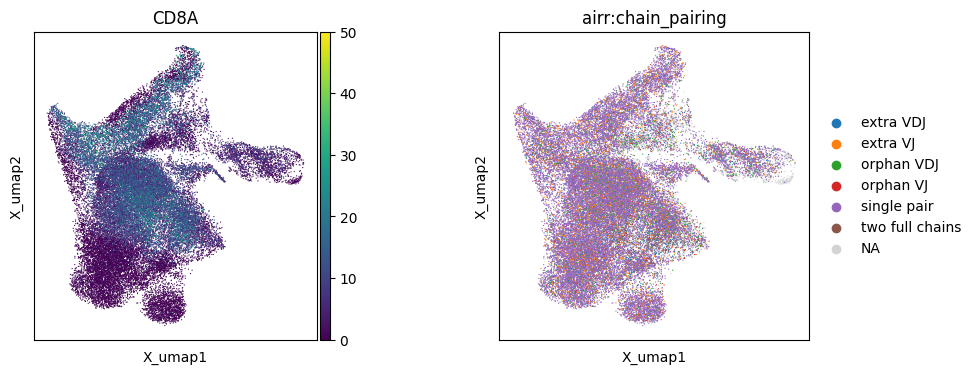

In [14]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata_umap, basis="gex:umap", color=["CD8A"], ax=ax0, show=False)
mu.pl.embedding(mdata_umap, basis="gex:umap", color=["airr:chain_pairing"], ax=ax1)

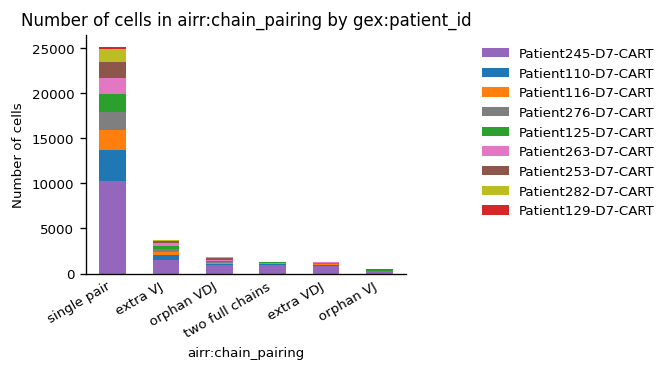

In [15]:
_ = ir.pl.group_abundance(mdata_umap, groupby="airr:chain_pairing", target_col="gex:patient_id")

In [16]:
mu.pp.filter_obs(mdata_umap, "airr:chain_pairing", lambda x: ~np.isin(x, ["orphan VDJ", "orphan VJ"]))
mu.pp.filter_obs(mdata_combat, "airr:chain_pairing", lambda x: ~np.isin(x, ["orphan VDJ", "orphan VJ"]))
mdata_umap.write_h5mu('/home/emma/data/CART/Stanford_D7sorted_CD3E_CD4_CD8A_highly_variable_harmony_umap_scRNA_tcr_chain_indexed.h5mu')
mdata_combat.write_h5mu('/home/emma/data/CART/Stanford_D7sorted_CD3E_CD4_CD8A_highly_variable_combat_scRNA_tcr_chain_indexed.h5mu')

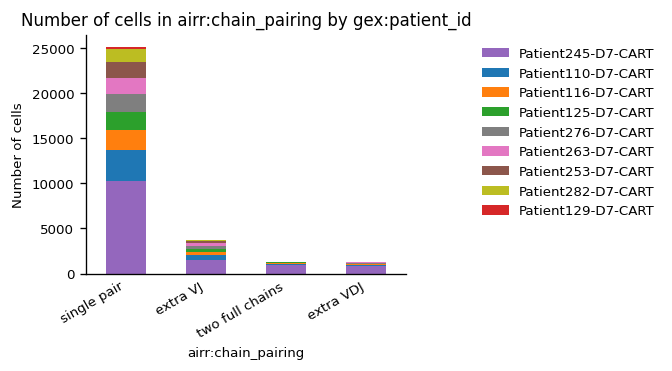

In [17]:
_ = ir.pl.group_abundance(mdata_umap, groupby="airr:chain_pairing", target_col="gex:patient_id")

In [3]:
mdata = ir.io.read_h5mu('/home/emma/data/CART/Stanford_D7sorted_CD3E_CD4_CD8A_highly_variable_harmony_umap_scRNA_tcr_chain_indexed.h5mu')
mdata

/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/.local/lib/python3.10/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 46138 × 6557
  2 modalities
    gex:	36803 x 6557
      obs:	'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'cell_type', 'JUNDandFYN', 'JUNDorFYN', 'CD81', 'n_counts', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'response'
      var:	'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'airr:chain_pairing_colors', 'hvg', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_pca_harmony', 'X_pca_harmony_sub', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    airr:	40802 x 0
      obs:	'patient_id', 'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [6]:
mdata_CD4 = mdata.copy()
mdata_CD4.mod['gex'] = mdata_CD4['gex'][mdata_CD4['gex'].obs['cell_type'] == 'CD4', :]
mdata_CD4.mod['airr'] = mdata_CD4['airr'][mdata_CD4['airr'].obs_names.isin(mdata_CD4['gex'].obs_names)]
mdata_CD8 = mdata.copy()
mdata_CD8.mod['gex'] = mdata_CD8['gex'][mdata_CD8['gex'].obs['cell_type'] == 'CD8', :]
mdata_CD8.mod['airr'] = mdata_CD8['airr'][mdata_CD8['airr'].obs_names.isin(mdata_CD8['gex'].obs_names)]
mdata_CD4.update()
mdata_CD8.update()

print(mdata_CD4)
print(mdata_CD8)

mdata_CD4.write_h5mu('/home/emma/data/CART/mdata_CD4.h5mu')
mdata_CD8.write_h5mu('/home/emma/data/CART/mdata_CD8.h5mu')


/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


MuData object with n_obs × n_vars = 14014 × 6557
  2 modalities
    gex:	14014 x 6557
      obs:	'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'cell_type', 'JUNDandFYN', 'JUNDorFYN', 'CD81', 'n_counts', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'response'
      var:	'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'airr:chain_pairing_colors', 'hvg', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_pca_harmony', 'X_pca_harmony_sub', 'X_uma

In [3]:
mdata_CD4 = ir.io.read_h5mu('/home/emma/data/CART/mdata_CD4.h5mu')
mdata_CD8 = ir.io.read_h5mu('/home/emma/data/CART/mdata_CD8.h5mu')

/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/.local/lib/python3.10/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated

In [4]:
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(mdata_CD4)
ir.tl.define_clonotypes(mdata_CD4, receptor_arms="all", dual_ir="primary_only")
mdata_CD4

MuData object with n_obs × n_vars = 14014 × 6557
  2 modalities
    gex:	14014 x 6557
      obs:	'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'cell_type', 'JUNDandFYN', 'JUNDorFYN', 'CD81', 'n_counts', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'response'
      var:	'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'airr:chain_pairing_colors', 'hvg', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_pca_harmony', 'X_pca_harmony_sub', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    airr:	12543 x 0
      obs:	'patient_id', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size'
      uns:	'chain_indices', 'ir_dist_nt_identity', 'clone_id'
      obsm:	'airr', 'chain_indices'

In [5]:
ir.tl.clonotype_network(mdata_CD4, min_cells=2)

In [7]:
mdata_CD4.obs.groupby("gex:JUNDandFYN", dropna=False).size()

gex:JUNDandFYN
J+F+    6009
Rest    8005
dtype: int64

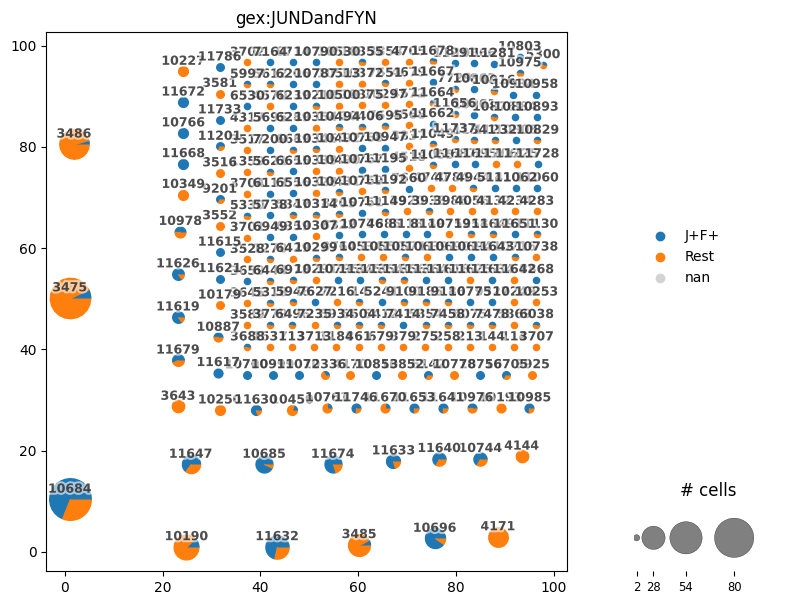

In [8]:
_ = ir.pl.clonotype_network(mdata_CD4, color="gex:JUNDandFYN", base_size=10, label_fontsize=9, panel_size=(7, 7))

In [9]:
ir.pp.ir_dist(
    mdata_CD4,
    metric="tcrdist",
    sequence="aa",
    cutoff=15,
)
ir.tl.define_clonotype_clusters(mdata_CD4, sequence="aa", metric="tcrdist", receptor_arms="all", dual_ir="any")
mdata_CD4

/home/emma/miniconda3/envs/tcr_analysis/lib/python3.10/site-packages/scirpy/ir_dist/metrics.py:958: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  data_rows[row_index][0] = data_row_matrix[thread_id, 0:row_end_index].copy()


MuData object with n_obs × n_vars = 14014 × 6557
  2 modalities
    gex:	14014 x 6557
      obs:	'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'cell_type', 'JUNDandFYN', 'JUNDorFYN', 'CD81', 'n_counts', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'response'
      var:	'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'airr:chain_pairing_colors', 'hvg', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_pca_harmony', 'X_pca_harmony_sub', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    airr:	12543 x 0
      obs:	'patient_id', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size', 'cc_aa_tcrdist', 'cc_aa_tcrdist_size'
      uns:	'chain_indices', 'ir_dist_nt_identity', 'clone_id', 'clonotype_network', 'ir_dist_aa_tcrdist', 'cc_aa_tcrdist'
      obsm:	'airr', 'chain_indices', 'X_clonotype_network'

In [10]:
ir.tl.clonotype_network(mdata_CD4, min_cells=3, sequence="aa", metric="tcrdist")

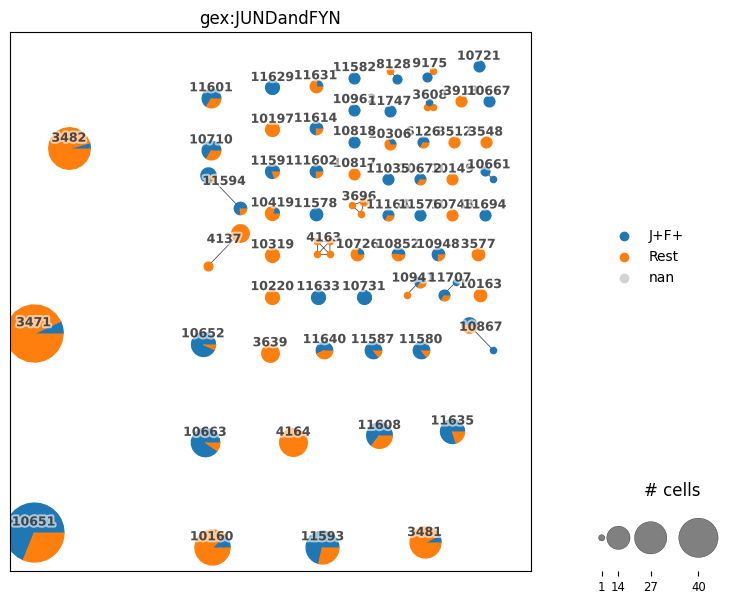

In [11]:
_ = ir.pl.clonotype_network(mdata_CD4, color="gex:JUNDandFYN", label_fontsize=9, panel_size=(7, 7), base_size=20)

In [14]:
with ir.get.airr_context(mdata_CD4, "junction_aa", ["VJ_1", "VDJ_1", "VJ_2", "VDJ_2"]):
    cdr3_ct_4137 = (
        # TODO astype(str) is required due to a bug in pandas ignoring `dropna=False`. It seems fixed in pandas 2.x
        mdata_CD4.obs.loc[lambda x: x["airr:cc_aa_tcrdist"] == "4137"]
        .astype(str)
        .groupby(
            [
                "VJ_1_junction_aa",
                "VDJ_1_junction_aa",
                "VJ_2_junction_aa",
                "VDJ_2_junction_aa",
                "airr:receptor_subtype",
            ],
            observed=True,
            dropna=False,
        )
        .size()
        .reset_index(name="n_cells")
    )
cdr3_ct_4137

,VJ_1_junction_aa,VDJ_1_junction_aa,VJ_2_junction_aa,VDJ_2_junction_aa,airr:receptor_subtype,n_cells
0,CAVSQHYTGANSKLTF,CASSLRAQAFTGDQPQHF,CIVRGSGAGSYQLTF,nan,TRA+TRB,8
1,CIVRGSGAGSYQLTF,CASSLRAQAFTGDQPQHF,CAVSQHYTGANSKLTF,nan,TRA+TRB,2


In [15]:
ir.tl.define_clonotype_clusters(
    mdata_CD4,
    sequence="aa",
    metric="tcrdist",
    receptor_arms="all",
    dual_ir="any",
    same_v_gene=True,
    key_added="cc_aa_tcrdist_same_v",
)

In [16]:
# find clonotypes with more than one `clonotype_same_v`
ct_different_v = mdata_CD4.obs.groupby("airr:cc_aa_tcrdist").apply(lambda x: x["airr:cc_aa_tcrdist_same_v"].nunique() > 1)
ct_different_v = ct_different_v[ct_different_v].index.values.tolist()
ct_different_v

['155', '301', '768', '2001', '2697', '3608', '9053', '11253']

In [17]:
with ir.get.airr_context(mdata_CD4, "v_call", ["VJ_1", "VDJ_1"]):
    ct_different_v_df = (
        mdata_CD4.obs.loc[
            lambda x: x["airr:cc_aa_tcrdist"].isin(ct_different_v),
            [
                "airr:cc_aa_tcrdist",
                "airr:cc_aa_tcrdist_same_v",
                "VJ_1_v_call",
                "VDJ_1_v_call",
            ],
        ]
        .sort_values("airr:cc_aa_tcrdist")
        .drop_duplicates()
        .reset_index(drop=True)
    )
ct_different_v_df

,airr:cc_aa_tcrdist,airr:cc_aa_tcrdist_same_v,VJ_1_v_call,VDJ_1_v_call
0,155,155,TRAV13-1,TRBV7-2
1,155,5037,TRAV1-2,TRBV5-1
2,301,301,TRAV23/DV6,TRBV7-3
3,301,10610,TRAV1-2,TRBV20-1
4,768,768,TRAV1-2,TRBV3-1
5,768,7010,TRAV30,TRBV4-3
6,2001,2001,TRAV25,TRBV30
7,2001,8256,TRAV26-1,TRBV5-1
8,2697,2697,TRAV13-2,TRBV7-2
9,2697,2698,TRAV13-2,TRBV7-3


In [18]:
ir.tl.clonal_expansion(mdata_CD4)
mdata_CD4

MuData object with n_obs × n_vars = 14014 × 6557
  2 modalities
    gex:	14014 x 6557
      obs:	'patient_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'cell_type', 'JUNDandFYN', 'JUNDorFYN', 'CD81', 'n_counts', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'response'
      var:	'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'airr:chain_pairing_colors', 'hvg', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_pca_harmony', 'X_pca_harmony_sub', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    airr:	12543 x 0
      obs:	'patient_id', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size', 'cc_aa_tcrdist', 'cc_aa_tcrdist_size', 'cc_aa_tcrdist_same_v', 'cc_aa_tcrdist_same_v_size', 'clonal_expansion'
      uns:	'chain_indices', 'ir_dist_nt_identity', 'clone_id', 'clonotype_network', 'ir_dist_aa_tcrdist', 'cc_aa_tcrdist', 'cc_aa_tcrdist_same_v'
      obsm:	'airr', 'chain_indices', 'X_clonotype_network'

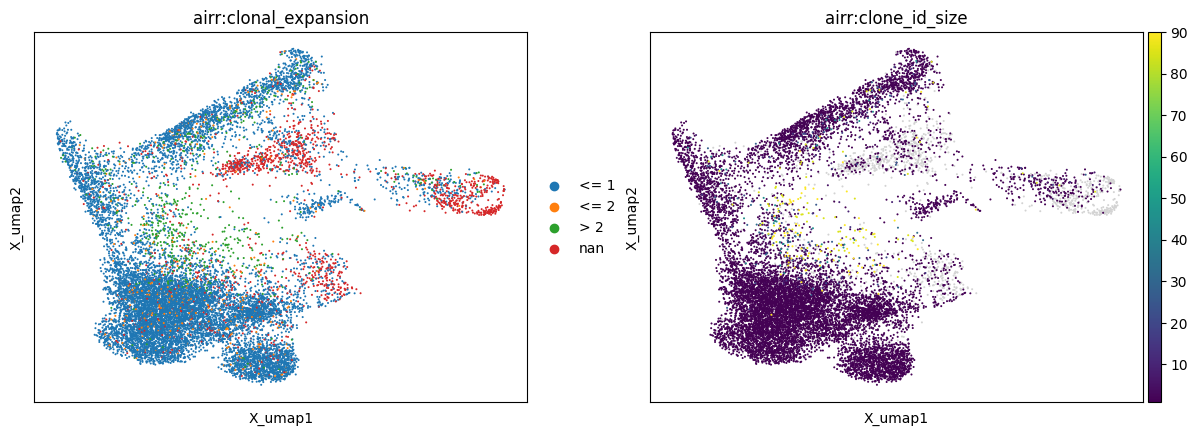

In [19]:
mu.pl.embedding(mdata_CD4, basis="gex:umap", color=["airr:clonal_expansion", "airr:clone_id_size"])

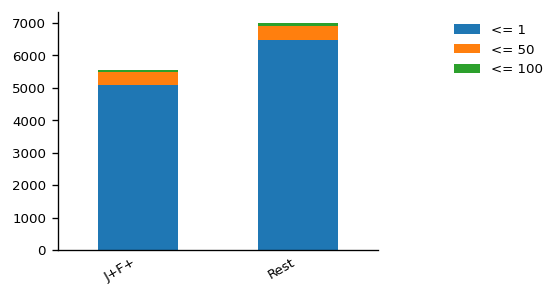

In [22]:
_ = ir.pl.clonal_expansion(mdata_CD4, target_col="clone_id", groupby="gex:JUNDandFYN", breakpoints=(1, 50, 100), normalize=False)

<function matplotlib.pyplot.show(close=None, block=None)>

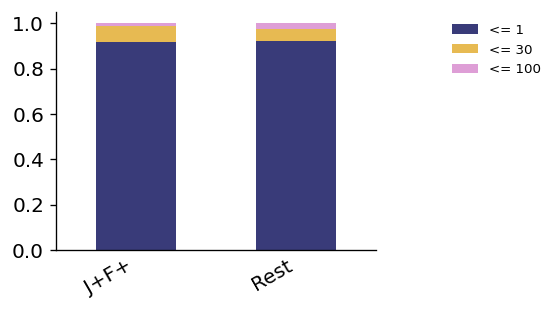

In [27]:
ir.pl.clonal_expansion(mdata_CD4, target_col="clone_id", breakpoints=(1, 30, 100), groupby="gex:JUNDandFYN", cmap='tab20b')
#plt.xlabel("Your X-axis Label", fontsize=14)  # Change X-axis label and font size
#plt.ylabel("Your Y-axis Label", fontsize=14)  # Change Y-axis label and font size

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#RdYlBu_r
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

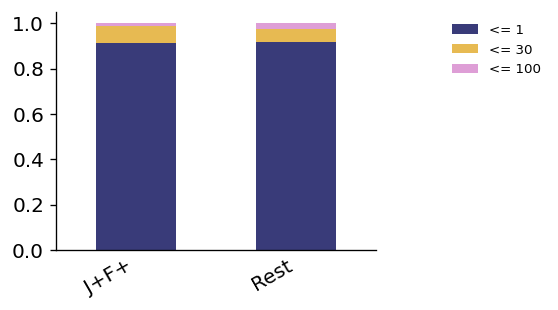

In [28]:
ir.pl.clonal_expansion(mdata_CD4, target_col="cc_aa_tcrdist", breakpoints=(1, 30, 100), groupby="gex:JUNDandFYN", cmap='tab20b')
#plt.xlabel("Your X-axis Label", fontsize=14)  # Change X-axis label and font size
#plt.ylabel("Your Y-axis Label", fontsize=14)  # Change Y-axis label and font size

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#RdYlBu_r
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

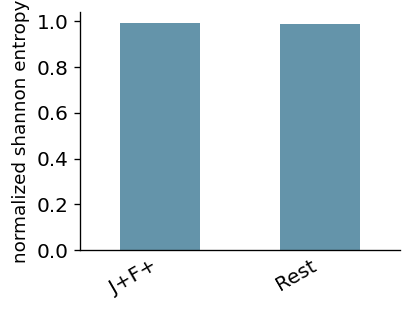

In [30]:
_ = ir.pl.alpha_diversity(mdata_CD4, metric="normalized_shannon_entropy", groupby="gex:JUNDandFYN", color='#6494AA')
plt.ylabel("normalized shannon entropy", fontsize=11)
plt.title('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#RdYlBu_r
plt.show

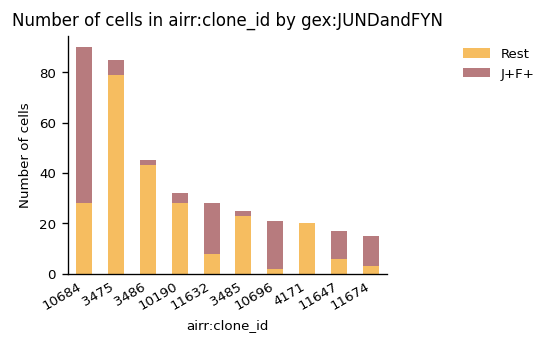

In [32]:
_ = ir.pl.group_abundance(
    mdata_CD4,
    groupby="airr:clone_id",
    target_col="gex:JUNDandFYN",
    max_cols=10,
    color=["#F6BD60", "#B77B7E"]  
)

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006'),
  Text(0, 0.008, '0.008'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.012, '0.012'),
  Text(0, 0.014, '0.014'),
  Text(0, 0.016, '0.016')])

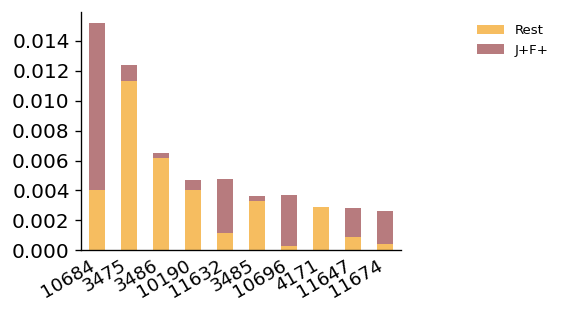

In [33]:
_ = ir.pl.group_abundance(
    mdata_CD4,
    groupby="airr:clone_id",
    target_col="gex:JUNDandFYN",
    max_cols=10,
    normalize="gex:JUNDandFYN",
    color=["#F6BD60", "#B77B7E"]  
)
plt.title('')
plt.ylabel("", fontsize=11)
plt.xlabel("", fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)

/home/emma/miniconda3/envs/tcr_analysis/lib/python3.10/site-packages/scirpy/pl/base.py:66: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = data.plot.bar(ax=ax, stacked=stacked, **kwargs)
/home/emma/miniconda3/envs/tcr_analysis/lib/python3.10/site-packages/scirpy/pl/base.py:66: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = data.plot.bar(ax=ax, stacked=stacked, **kwargs)


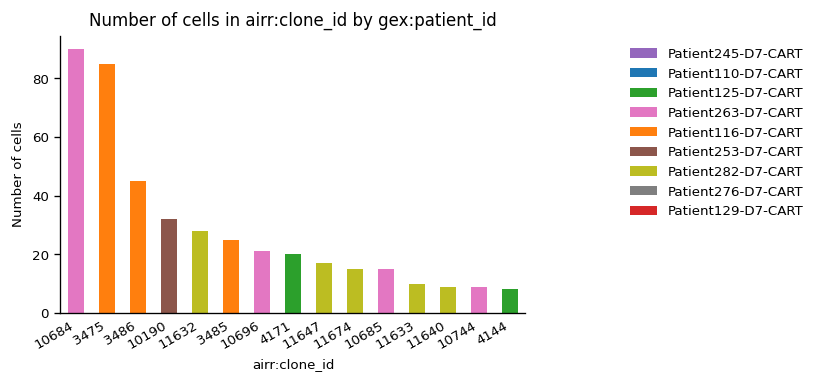

In [34]:
_ = ir.pl.group_abundance(mdata_CD4, groupby="airr:clone_id", target_col="gex:patient_id", max_cols=15, figsize=(5, 3), cmap='tab20b')

In [35]:
ir.tl.clonotype_convergence(mdata_CD4, key_coarse="cc_aa_tcrdist", key_fine="clone_id")

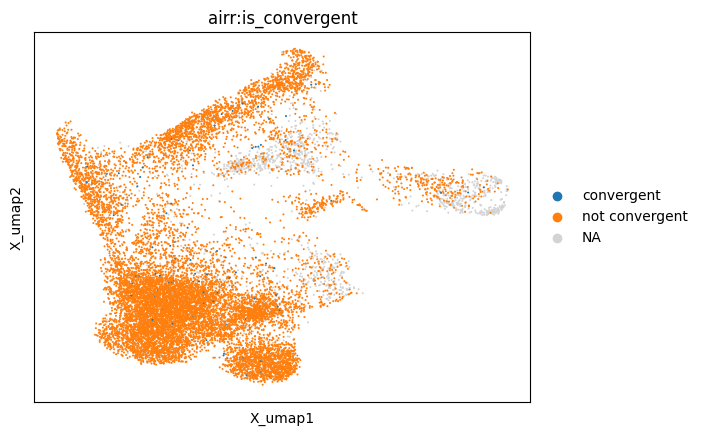

In [36]:
mu.pl.embedding(mdata_CD4, "gex:umap", color="airr:is_convergent")

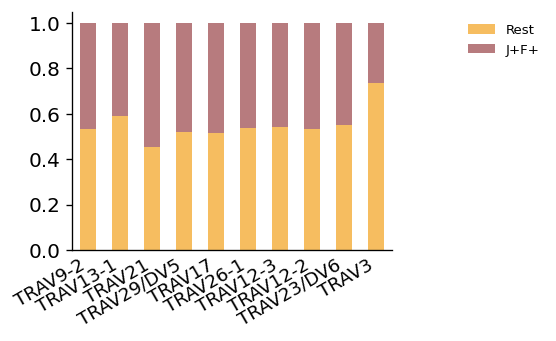

In [37]:
with ir.get.airr_context(mdata_CD4, "v_call"):
    ir.pl.group_abundance(
        mdata_CD4,
        groupby="VJ_1_v_call",
        target_col="gex:JUNDandFYN",
        normalize=True,
        max_cols=10,
    color=["#F6BD60", "#B77B7E"]  
)
plt.title('')
plt.ylabel("", fontsize=11)
plt.xlabel("", fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.show()

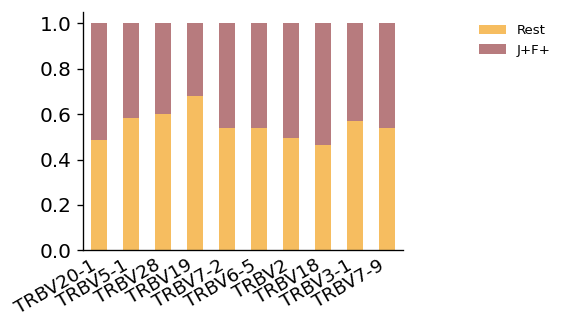

In [38]:
with ir.get.airr_context(mdata_CD4, "v_call"):
    ir.pl.group_abundance(
        mdata_CD4,
        groupby="VDJ_1_v_call",
        target_col="gex:JUNDandFYN",
        normalize=True,
        max_cols=10,
    color=["#F6BD60", "#B77B7E"]  
)
plt.title('')
plt.ylabel("", fontsize=11)
plt.xlabel("", fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.show()

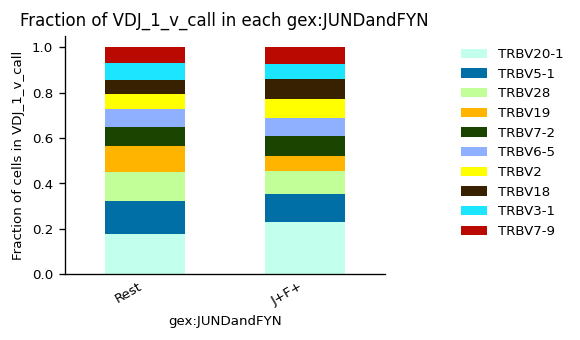

In [39]:
with ir.get.airr_context(mdata_CD4, "v_call"):
    ir.pl.group_abundance(
        mdata_CD4[
            mdata_CD4.obs["VDJ_1_v_call"].isin(["TRBV20-1", "TRBV5-1", "TRBV28", "TRBV19", "TRBV7-2", "TRBV6-5", "TRBV2", "TRBV18","TRBV3-1","TRBV7-9"]),
            :,
        ],
        groupby="gex:JUNDandFYN",
        target_col="VDJ_1_v_call",
        normalize=True,
    )

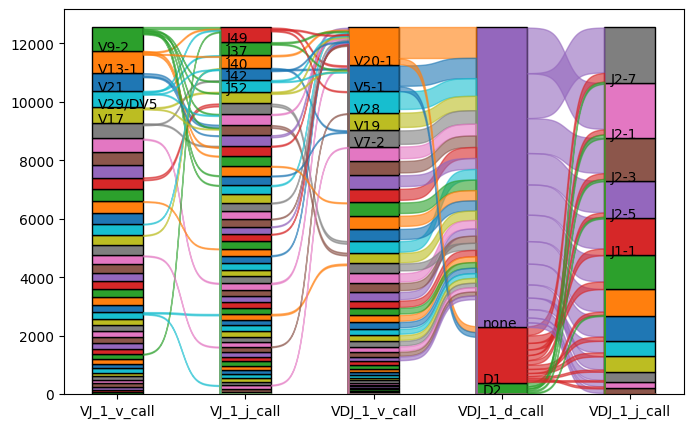

In [40]:
_ = ir.pl.vdj_usage(
    mdata_CD4,
    full_combination=False,
    max_segments=None,
    max_ribbons=30,
    fig_kws={"figsize": (8, 5)},
)

In [41]:
print(mdata_CD4.obsm.keys())  # Check for 'airr'
print(mdata_CD4.obs.columns)  # Ensure 'airr:clone_id' exists
print(mdata_CD4.obsm['airr'])


KeysView(MuAxisArrays with keys: airr, gex)
Index(['gex:patient_id', 'gex:n_genes', 'gex:n_genes_by_counts',
       'gex:total_counts', 'gex:total_counts_mt', 'gex:pct_counts_mt',
       'gex:doublet_scores', 'gex:predicted_doublets', 'gex:cell_type',
       'gex:JUNDandFYN', 'gex:JUNDorFYN', 'gex:CD81', 'gex:n_counts',
       'gex:leiden_0.3', 'gex:leiden_0.4', 'gex:leiden_0.5', 'gex:leiden_0.6',
       'gex:leiden_0.7', 'gex:leiden_0.8', 'gex:leiden_0.9', 'gex:leiden_1.0',
       'gex:leiden_1.1', 'gex:leiden_1.2', 'gex:leiden_1.3', 'gex:leiden_1.4',
       'gex:leiden_1.5', 'gex:response', 'airr:patient_id',
       'airr:receptor_type', 'airr:receptor_subtype', 'airr:chain_pairing',
       'airr:clone_id', 'airr:clone_id_size', 'airr:cc_aa_tcrdist',
       'airr:cc_aa_tcrdist_size', 'airr:cc_aa_tcrdist_same_v',
       'airr:cc_aa_tcrdist_same_v_size', 'airr:clonal_expansion',
       'airr:is_convergent'],
      dtype='object')
[ True  True  True ... False  True  True]


In [42]:
print(mdata_CD4.obs["airr:clone_id"].unique())


['0', '1', '2', '3', '4', ..., '11796', '11797', '11798', '11799', '11800']
Length: 11802
Categories (11801, object): ['0', '1', '2', '3', ..., '11797', '11798', '11799', '11800']


/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/emma/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


<AxesSubplot: >

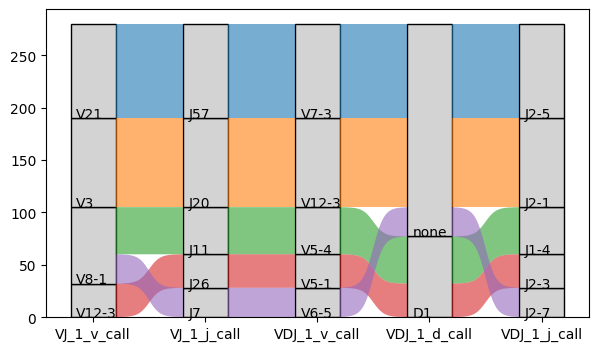

In [43]:
clone_data = mdata_CD4.copy()
clone_data = clone_data[clone_data.obs["airr:clone_id"].isin(["10684", "3475", "3486", "10190", "11632"])].copy()
clone_data.update()

# Plot with conservative parameters
ir.pl.vdj_usage(
    clone_data,
    max_ribbons=10,
    max_segments=50
)

<AxesSubplot: title={'center': 'Spectratype of junction_aa by gex:JUNDandFYN'}, xlabel='junction_aa length', ylabel='Number of cells'>

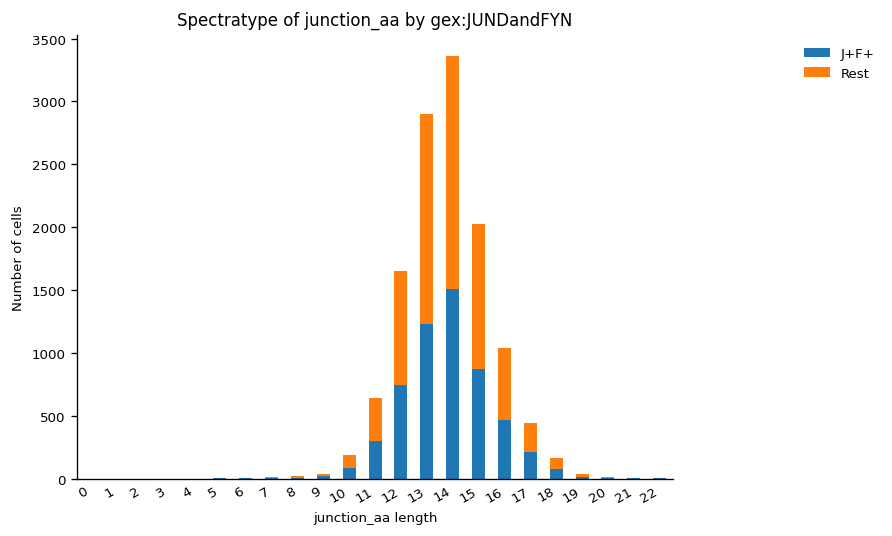

In [44]:
ir.pl.spectratype(mdata_CD4, color="gex:JUNDandFYN", viztype="bar", fig_kws={"dpi": 120})

/home/emma/miniconda3/envs/tcr_analysis/lib/python3.10/site-packages/scirpy/pl/base.py:262: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(order)


<AxesSubplot: title={'center': 'Spectratype of junction_aa by gex:JUNDandFYN'}, xlabel='junction_aa length'>

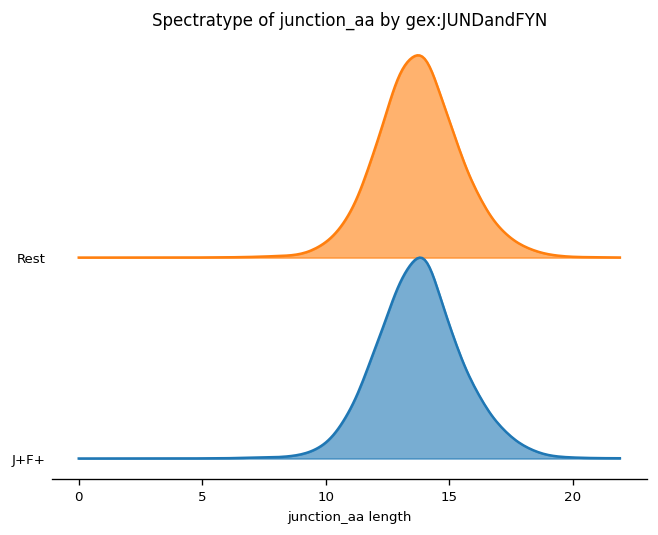

In [45]:
ir.pl.spectratype(
    mdata_CD4,
    color="gex:JUNDandFYN",
    viztype="curve",
    curve_layout="shifted",
    fig_kws={"dpi": 120},
    kde_kws={"kde_norm": False},
)

In [46]:
df, dst, lk = ir.tl.repertoire_overlap(mdata_CD4, "gex:JUNDandFYN", inplace=False)
df.head()

clone_id,0,1,2,3,4,5,6,7,8,9,...,11791,11792,11793,11794,11795,11796,11797,11798,11799,11800
gex:JUNDandFYN,,,,,,,,,,,,,,,,,,,,,
J+F+,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
Rest,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: title={'center': 'Repertoire overlap between J+F+ and Rest'}, xlabel='Clonotype size in J+F+', ylabel='Clonotype size in Rest'>

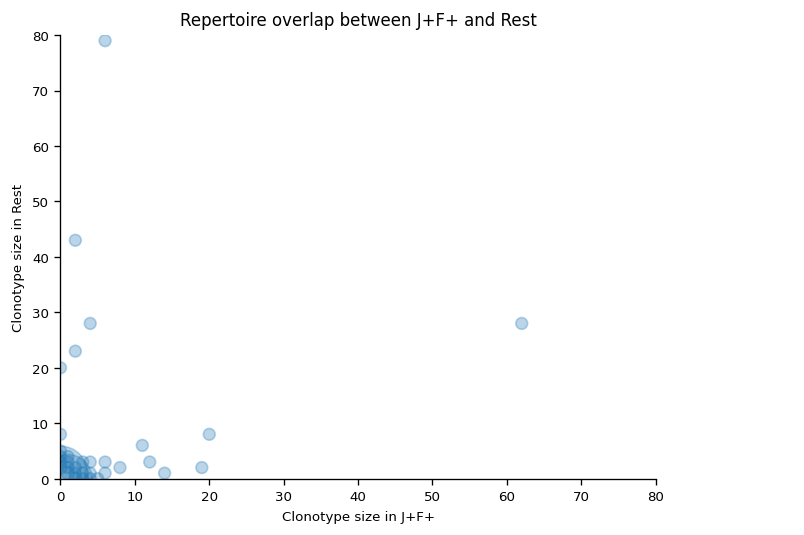

In [48]:
ir.pl.repertoire_overlap(mdata_CD4, "gex:JUNDandFYN", pair_to_plot=["J+F+", "Rest"], fig_kws={"dpi": 120})

In [49]:
ir.tl.clonotype_modularity(mdata_CD4, target_col="airr:cc_aa_tcrdist")

  0%|          | 0/11761 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

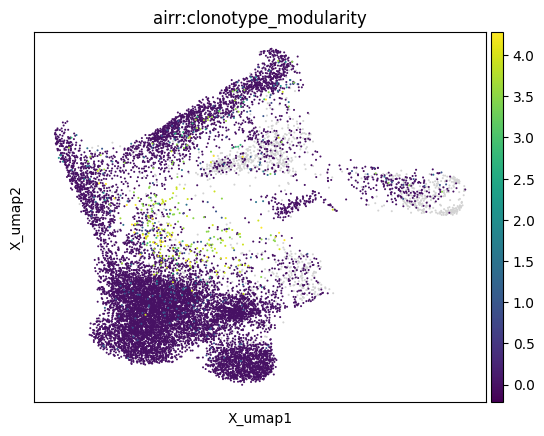

In [50]:
mu.pl.embedding(mdata_CD4, basis="gex:umap", color="airr:clonotype_modularity")

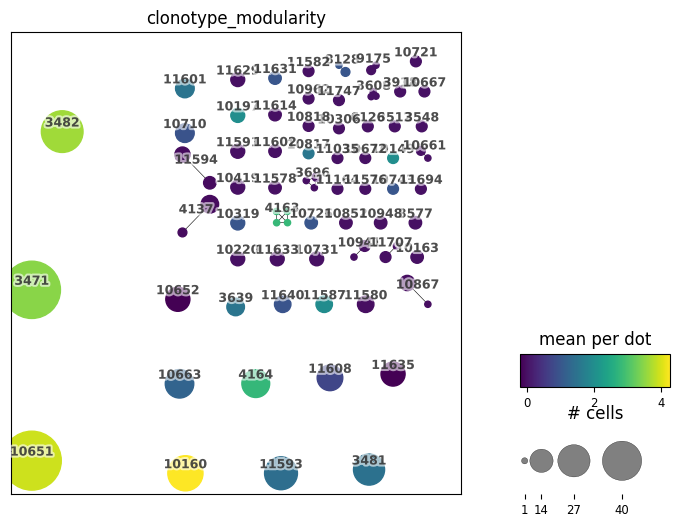

In [51]:
_ = ir.pl.clonotype_network(
    mdata_CD4,
    color="clonotype_modularity",
    label_fontsize=9,
    panel_size=(6, 6),
    base_size=20,
)

<AxesSubplot: xlabel='modularity score', ylabel='-log10(FDR)'>

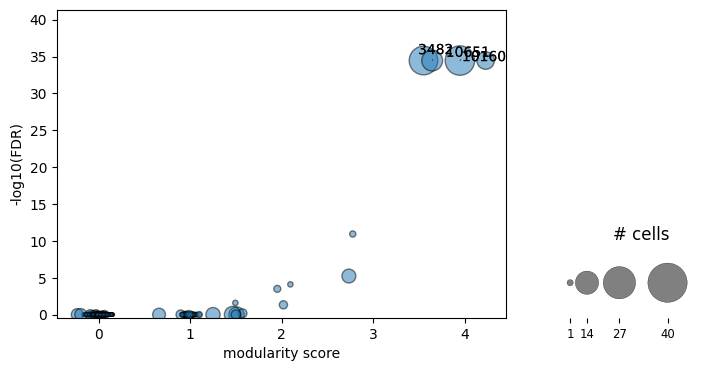

In [52]:
ir.pl.clonotype_modularity(mdata_CD4, base_size=20)

In [53]:
clonotypes_top_modularity = list(
    mdata_CD4.obs.set_index("airr:cc_aa_tcrdist")["airr:clonotype_modularity"]
    .sort_values(ascending=False)
    .index.unique()
    .values[:2]
)

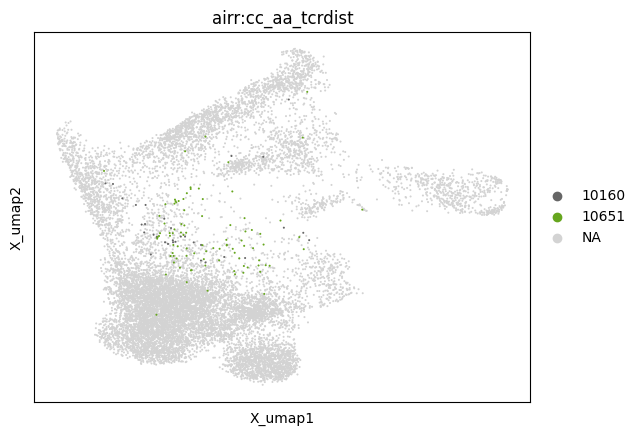

In [54]:
import matplotlib.pyplot as plt
from matplotlib import cm  
from cycler import cycler

test_ad = mu.pl.embedding(
    mdata_CD4,
    basis="gex:umap",
    color="airr:cc_aa_tcrdist",
    groups=clonotypes_top_modularity,
    palette=cycler(color=cm.get_cmap("Dark2_r").colors),  # Use `cm.get_cmap` for the colormap
)


In [55]:
freq, stat = ir.tl.clonotype_imbalance(
    mdata_CD4,
    replicate_col="gex:patient_id",
    groupby="gex:JUNDandFYN",
    case_label="J+F+",
    control_label="Rest",
    inplace=False,
)
top_differential_clonotypes = stat["clone_id"].tolist()[:3]

/home/emma/miniconda3/envs/tcr_analysis/lib/python3.10/site-packages/scirpy/tl/_clonotype_imbalance.py:272: RuntimeWarning: divide by zero encountered in log2
  logfoldchange = np.log2((case_mean_freq + global_minimum) / (control_mean_freq + global_minimum))


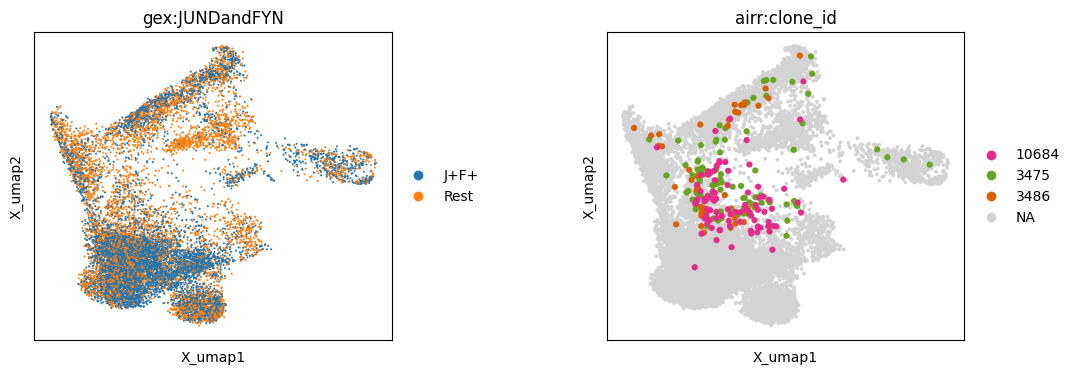

In [56]:
import matplotlib.pyplot as plt
from matplotlib import cm  
from cycler import cycler
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 0.6})
mu.pl.embedding(mdata_CD4, basis="gex:umap", color="gex:JUNDandFYN", ax=ax1, show=False)
mu.pl.embedding(
    mdata_CD4,
    basis="gex:umap",
    color="airr:clone_id",
    groups=top_differential_clonotypes,
    ax=ax2,
    # increase size of highlighted dots
    size=[
        80 if c in top_differential_clonotypes else 30 for c in mdata_CD4.obs["airr:clone_id"][mdata_CD4.mod["gex"].obs_names]
    ],
    palette=cycler(color=cm.get_cmap("Dark2_r").colors)
)

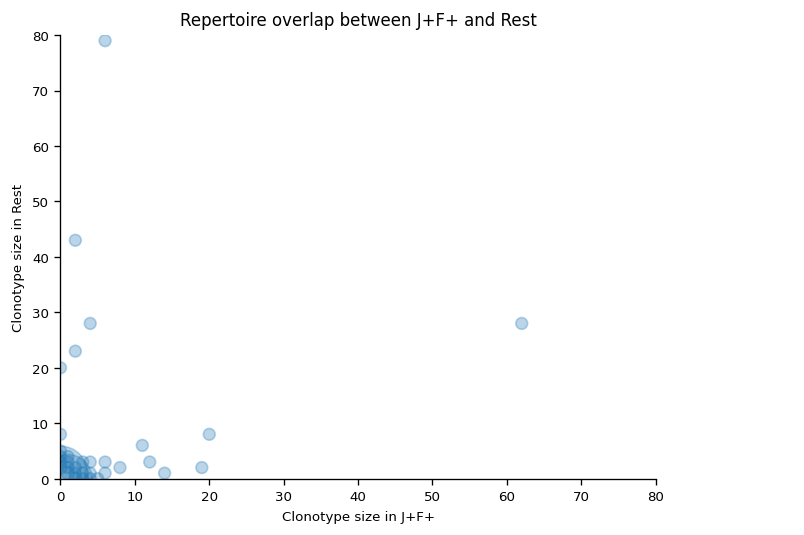

In [57]:
# ir.tl.repertoire_overlap(mdata, "gex:cluster")
_ = ir.pl.repertoire_overlap(mdata_CD4, "gex:JUNDandFYN", pair_to_plot=["J+F+", "Rest"], fig_kws={"dpi": 120})